In [1]:
import requests
from bs4 import BeautifulSoup

In [6]:
# Target web page:
url = "https://www.reddit.com/r/popular/?geo_filter=US"

# Establishing the connection to the web page:
response = requests.get(url, headers = {'User-agent': 'your custom agent here'})
print('Status Code: ',response.status_code)

Status Code:  200


In [57]:
reddit = response.text
# The first 700 characters of the content.
print("\nFirst part of HTML document fetched as string:\n")
print(reddit[:100])


First part of HTML document fetched as string:

<!doctype html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head><title>reddi


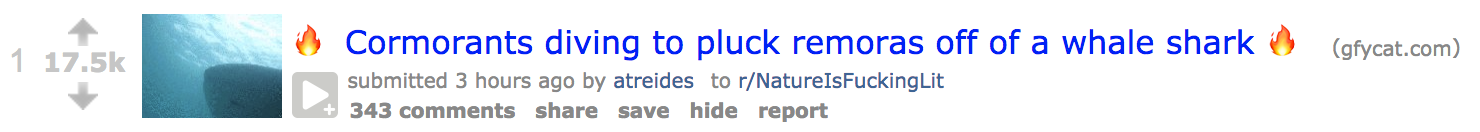

In [8]:
soup = BeautifulSoup(reddit, 'lxml')
print(soup.title)
print(soup.title.text)

<title>reddit: the front page of the internet</title>
reddit: the front page of the internet


In [60]:
p_list = soup.body.find_all('div')
print(len(p_list))
for x in range(len(p_list)):
    print(x, '\n', p_list[x], '\n',  '\n');

436
0 
 <div id="block-homepage"></div> 
 

1 
 <div class="GoogleAd HomeAds InArticleAd LeftAd SidebarAd ad-300-250 ad-banner adbar adbox1 ads-area adsense-ad box_ad googad" id="adblock-test"></div> 
 

2 
 <div id="onboarding-splash" style="display: none"><div class="splash_wrapper"><div class="modal-dialog modal-dialog-lg"><div class="modal-content"><div class="modal-header"><div class="modal-header-close"><a class="c-close c-hide-text skip-for-now" data-dismiss="modal" href="javascript: void 0;">close this window</a></div></div><div class="modal-body"><script id="onboarding-wrapper" type="text/template"><!-- Login form function --><div id="desktop-onboarding-browse" class="c-step-sign-up"><div class="desktop-onboarding-step desktop-onboarding-step_sign-up"><div class="desktop-onboarding__col desktop-onboarding__col_sign-up_form"><div class="reddit-logo"><img width='200px' src="//www.redditstatic.com/logo.svg" /></div><h2 class="desktop-onboarding__title">Sign up to get your own per

 

83 
 <div aria-label="upvote" class="arrow up login-required access-required" data-event-action="upvote" role="button" tabindex="0"></div> 
 

84 
 <div class="score dislikes" title="17880">17.9k</div> 
 

85 
 <div class="score unvoted" title="17881">17.9k</div> 
 

86 
 <div class="score likes" title="17882">17.9k</div> 
 

87 
 <div aria-label="downvote" class="arrow down login-required access-required" data-event-action="downvote" role="button" tabindex="0"></div> 
 

88 
 <div class="entry unvoted"><div class="top-matter"><p class="title"><a class="title may-blank outbound" data-event-action="title" data-href-url="https://www.marketwatch.com/story/people-are-walking-into-glass-at-the-new-apple-headquarters-2018-02-15" data-outbound-expiration="1518807608000" data-outbound-url="https://out.reddit.com/t3_7xytmz?url=https%3A%2F%2Fwww.marketwatch.com%2Fstory%2Fpeople-are-walking-into-glass-at-the-new-apple-headquarters-2018-02-15&amp;token=AQAAOCqHWrubZ81YF5xnLRt9ck_frQSO0aqFzLT7DJ

In [66]:
#top-matter
p_list = soup.body.find_all('div' , {'class':'top-matter'})
print(len(p_list))
#for x in range(len(p_list)):
    #    print(x, '\n', p_list[x], '\n',  '\n');

25


In [94]:
q_list = soup.find_all('a', {'class':'subreddit hover may-blank'})
len(q_list)
for x in range(len(q_list)):
    print(q_list[x].text)

r/NatureIsFuckingLit
r/nottheonion
r/funny
r/space
r/dataisbeautiful
r/BikiniBottomTwitter
r/LifeProTips
r/IASIP
r/gameofthrones
r/videos
r/aww
r/sports
r/pics
r/AskReddit
r/gaming
r/Military
r/RoomPorn
r/gifs
r/StarWars
r/youdontsurf
r/news
r/todayilearned
r/gifs
r/nononono
r/interestingasfuck


In [81]:
p_list = soup.body.find_all('div' , {'class':'top-matter'})
for element in p_list:
    q_list = soup.find('a', {'class':'subreddit hover may-blank'})
    print(x, '\n', q_list.text, '\n',  '\n')

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 

24 
 r/NatureIsFuckingLit 
 



## 0. Scraps

In [49]:
results_list = []
# Get all the <div class="quote"> elements
all_quotes = soup.find_all('div', {'class':'top-matter'})
for element in all_quotes:
    # start a dictionary to store this item's data
    result = {}   
    # get the quote
    a_quote = element.find('a')
    if a_quote:
        result['link'] = a_quote['href'] # href link
        result['quote'] = a_quote.text   
    # append it to our list
    results_list.append(result)

In [53]:
results_list[0]

{'link': 'https://gfycat.com/HastyTornAmericanredsquirrel',
 'quote': '🔥 Cormorants diving to pluck remoras off of a whale shark 🔥'}

In [50]:
# Print all from the first page
for x in range(len(results_list)):
    print(x+1, "-", results_list[x]['link'])

1 - https://gfycat.com/HastyTornAmericanredsquirrel
2 - https://www.marketwatch.com/story/people-are-walking-into-glass-at-the-new-apple-headquarters-2018-02-15
3 - https://i.imgur.com/UjpwIRe.gifv
4 - https://www.nasa.gov/mediacast/gravity-assist-podcast-venus-with-david-grinspoon
5 - /r/dataisbeautiful/comments/7xz836/my_weight_loss_over_126_weeks_oc/
6 - /r/BikiniBottomTwitter/comments/7xyyum/all_the_damn_time/
7 - /r/LifeProTips/comments/7xz46s/lpt_if_you_get_a_kitten_do_use_your_hands_for/
8 - https://i.redd.it/jojrqogslkg01.jpg
9 - /r/gameofthrones/comments/7xyk16/everything_would_be_awesome_to_see_the_intro_for/
10 - https://www.youtube.com/watch?v=jCb-WcxO5SU&feature=youtu.be&t=51
11 - /r/aww/comments/7xyggn/maine_coon_kitten/
12 - https://i.imgur.com/KwGujY7.gifv
13 - /r/pics/comments/7xy7rp/17_victims_chris_hixon_nicholas_dworet_aaron_feis/
14 - /r/AskReddit/comments/7xylsv/if_there_was_a_reddit_olympics_what_would_the/
15 - /r/gaming/comments/7xz5j2/playing_on_low_settings_v

In [47]:
# Print all from the first page
for x in range(len(results_list)):
    print(x+1, "-", results_list[x]['quote'])

1 - 🔥 Cormorants diving to pluck remoras off of a whale shark 🔥
2 - People are walking into glass at the new Apple headquarters
3 - When you’re bored at work
4 - on Venus, you can walk fast enough to keep the sunset in the same place and watch sunset forever just by walking
5 - My weight loss over 126 weeks [OC]
6 - all the damn time.
7 - LPT: If you get a kitten, DO use your hands for play so you can teach restraint when they are too rough. Restraint is naturally learned in play with hands and littermates because the fun stops when a bite or scratch is too much. Adult cats who didn't play this way are more likely to scratch or bite.
8 - I'm Cultivating mass!
9 - [EVERYTHING] Would be awesome to see the intro for the final season done in ice to represent that winter is here to stay.
10 - What's a computer?
11 - Maine coon kitten.
12 - Akwasi Frimpong, Ghana's First Skeleton Athlete, Enjoying PyeongChang
13 - 17 Victims - Chris Hixon, Nicholas Dworet, Aaron Feis, Gina Montalto, Scott Be

## 1. Title

In [100]:
titles = soup.find_all('a', {'class':'title may-blank outbound'})
for x in range(len(titles)):
    print(titles[x].text)

🔥 Cormorants diving to pluck remoras off of a whale shark 🔥
People are walking into glass at the new Apple headquarters
When you’re bored at work
on Venus, you can walk fast enough to keep the sunset in the same place and watch sunset forever just by walking
I'm Cultivating mass!
What's a computer?
Akwasi Frimpong, Ghana's First Skeleton Athlete, Enjoying PyeongChang
Climbing up a ladder
I've always loved the parallel between these two shots, from Revenge of the Sith and The Clone Wars.
A lucky few
Kentucky governor blames violent video games, movies, not guns for school shootings
TIL that diamond, despite being the hardest material known, will shatter if hit with a hammer. Hardness means resistance to scratching; toughness is a different property.
Being seated next to Jennifer Lawrence and Emma Watson
House being swept away in the river gets torn to shreads by a bridge
This table's length can be doubled


## 2. The subreddit that the thread corresponds to

In [96]:
subreddit = soup.find_all('a', {'class':'subreddit hover may-blank'})
for x in range(len(subreddit)):
    print(q_list[x].text)

r/NatureIsFuckingLit
r/nottheonion
r/funny
r/space
r/dataisbeautiful
r/BikiniBottomTwitter
r/LifeProTips
r/IASIP
r/gameofthrones
r/videos
r/aww
r/sports
r/pics
r/AskReddit
r/gaming
r/Military
r/RoomPorn
r/gifs
r/StarWars
r/youdontsurf
r/news
r/todayilearned
r/gifs
r/nononono
r/interestingasfuck


## 3. The length of time it has been up on Reddit

In [102]:
#live-timestamp
time = soup.find_all('time', {'class':'live-timestamp'})
for x in range(len(time)):
    print(time[x].text)

3 hours ago
4 hours ago
3 hours ago
2 hours ago
3 hours ago
2 hours ago
2 hours ago
5 hours ago
4 hours ago
3 hours ago
4 hours ago
3 hours ago
6 hours ago
4 hours ago
3 hours ago
4 hours ago
5 hours ago
5 hours ago
5 hours ago
3 hours ago
5 hours ago
5 hours ago
5 hours ago
5 hours ago
6 hours ago


## 4. The number of comments on the thread

In [103]:
# bylink comments may-blank
comments = soup.find_all('a', {'class':'bylink comments may-blank'})
for x in range(len(comments)):
    print(comments[x].text)

340 comments
944 comments
1230 comments
309 comments
563 comments
227 comments
532 comments
125 comments
439 comments
1221 comments
296 comments
252 comments
5680 comments
2605 comments
130 comments
237 comments
177 comments
809 comments
419 comments
39 comments
6450 comments
2229 comments
703 comments
491 comments
344 comments


## 5. The number used to move to the next page